In [1]:
import sys
sys.path.insert(0, "..")
from classes.stat_phys.potentials import MD_Simulator
import matplotlib.pyplot as plt
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
def v_func(x, x_0=0.0, x_1=1.5, k=1.0, A=-1.1, lamb=0.2):
    t1 = 1.0/2.0*k*(x-x_0)**2
    t2 = A*np.exp(-((x-x_1)/lamb)**2)
    return t1 + t2

def acc_func(x, x_0=0.0, x_1=1.5, k=1.0, A=-1.1, lamb=0.2, m=1.0):
    t1 = -k*(x-x_0)
    t2 = 2.0*A*(x-x_1)/lamb**2*np.exp(-((x-x_1)/lamb)**2)
    return (t1+t2)/m

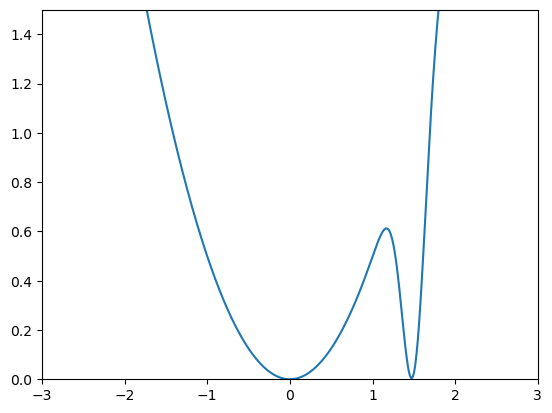

In [3]:
fig, ax = plt.subplots()
xs = np.linspace(-4.0,4.0, 1000)
ax.set_xlim([-3,3])
ax.set_ylim([0,1.5])
ax.plot(xs, v_func(xs))

In [4]:
def proposal_func(x, x_min=-0.5, x_max=0.5):
    return x + np.random.uniform(x_min, x_max)
md_simulator = MD_Simulator(temp=0.15, v_func=v_func, acc_func=acc_func)

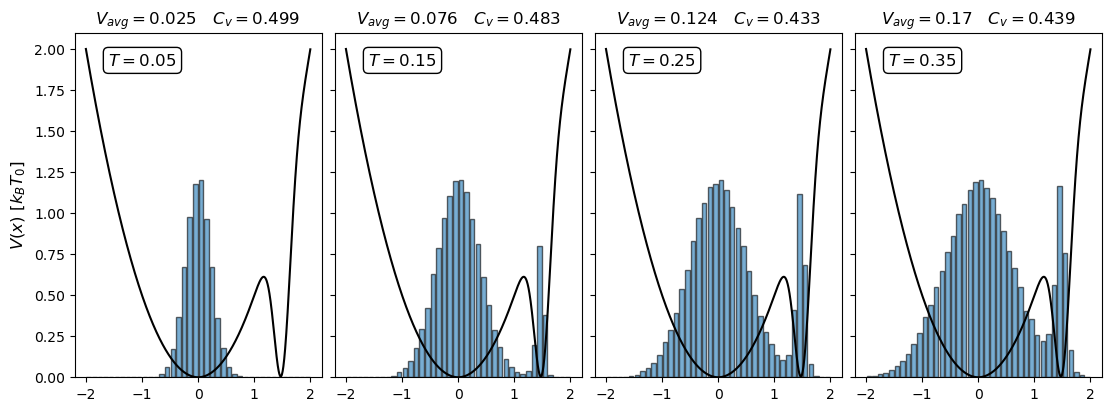

In [5]:
fig, axs = plt.subplots(1,4, figsize=(11,4), sharey=True, layout="constrained")
axs[0].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
for ax, temp in zip(axs.flatten(), [0.05, 0.15, 0.25, 0.35]):
    ax.annotate(text=r"$T = $"+f"{temp}", xy=(-1.6, 1.9), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    md_simulator.temp = temp
    result = md_simulator.run_metropolis_montecarlo(N_points=100000, x_init=0.0, proposal_func=proposal_func)
    md_simulator.plot(ax=ax, x_distribution=result, bin_size=0.1)

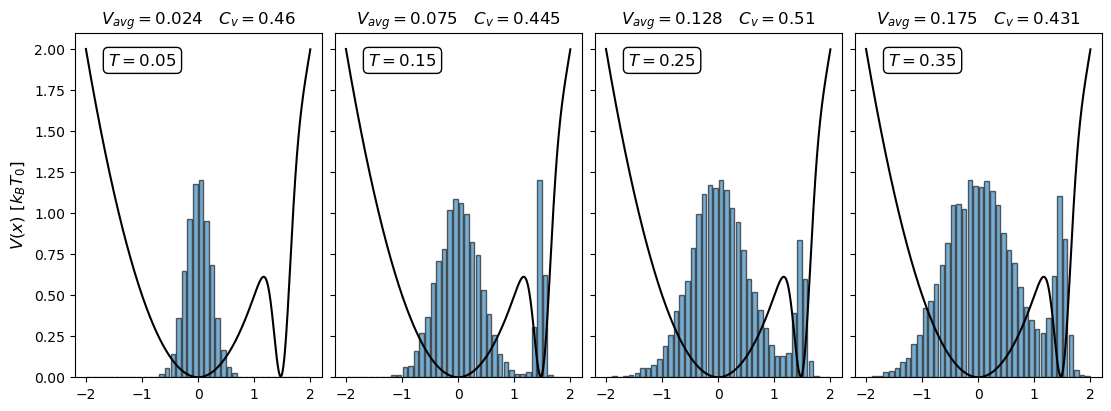

In [6]:
fig, axs = plt.subplots(1,4, figsize=(11,4), sharey=True, layout="constrained")
axs[0].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
md_simulator.temp=0.15
for ax, temp in zip(axs.flatten(), [0.05, 0.15, 0.25, 0.35]):
    md_simulator.temp = temp
    ax.annotate(text=r"$T = $"+f"{temp}", xy=(-1.6, 1.9), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    result = md_simulator.run_md_simulation(N_steps=10000, x_init=0.0, v_init=0.0, t_init=0.0, method="verlet_integrate", integrate_steps=50)
    md_simulator.plot(ax=ax, x_distribution=result[:,1], bin_size=0.1)

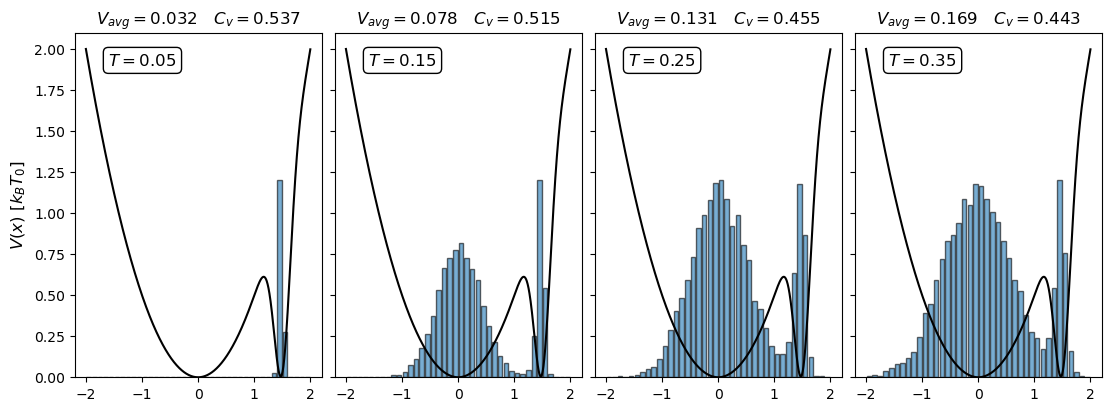

In [7]:
fig, axs = plt.subplots(1,4, figsize=(11,4), sharey=True, layout="constrained")
axs[0].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
md_simulator.temp=0.15
for ax, temp in zip(axs.flatten(), [0.05, 0.15, 0.25, 0.35]):
    md_simulator.temp = temp
    ax.annotate(text=r"$T = $"+f"{temp}", xy=(-1.6, 1.9), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    result = md_simulator.run_md_simulation(N_steps=10000, x_init=1.5, v_init=0.0, t_init=0.0, method="verlet_integrate", integrate_steps=50)
    md_simulator.plot(ax=ax, x_distribution=result[:,1], bin_size=0.1)